## CM3400 Worksheet 06 Sample Solutions

### Task 1 Performing a Linear Regression on Anscombe's Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
### Create the dataframe
x = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]
y = [4.26, 5.68, 7.24, 4.82, 6.95, 8.81, 8.04, 8.33, 10.84, 7.58, 9.96]
df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,4.0,4.26
1,5.0,5.68
2,6.0,7.24
3,7.0,4.82
4,8.0,6.95
5,9.0,8.81
6,10.0,8.04
7,11.0,8.33
8,12.0,10.84
9,13.0,7.58


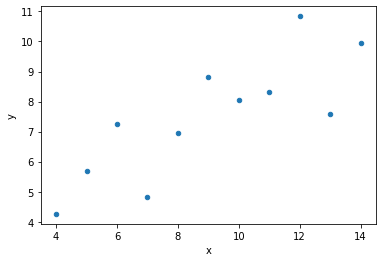

In [2]:
### Visualise the relationship between x and y on a scatterplot
df.plot.scatter(x = 'x', y = 'y')
plt.show()

In [3]:
print("Pearson correleation\n ", df.corr())
print("Pearson correleation\n ", df.corr(method = 'spearman'))
### Spearman shows a fairly strong positive correlation
### Pearson showsshow a fairly strong positive correlation to a straight line (since that's what Pearson's measures)

Pearson correleation
            x         y
x  1.000000  0.816421
y  0.816421  1.000000
Pearson correleation
            x         y
x  1.000000  0.818182
y  0.818182  1.000000


In [4]:
from statsmodels.formula.api import ols 
model1 = ols("y ~ x", data=df).fit()
model1.summary()

C:\Users\DAVID\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 24 Mar 2021   Prob (F-statistic):            0.00217
Time:                        14:30:46   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
## R^2 shows that x is explaining around 67& of the variation in target variable y
## Model created (from the coefficients) is that y=0.5*x+3

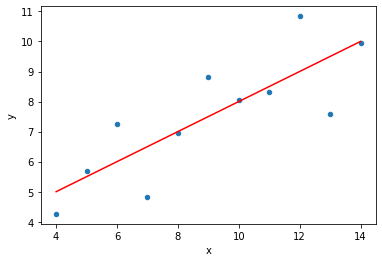

In [6]:
### Visualise the relationship between x and y on a scatterplot
ax = df.plot.scatter(x = 'x', y = 'y')
fittedline = model1.predict()
# Overlay best--fit line on same plot
ax.plot(df['x'], fittedline, 'r', )#linewidth=2)
plt.show()

In [7]:
## Performing a LinearRegression Model using sklearn
from sklearn.linear_model import LinearRegression
y = df['y']
X = df.drop(columns = 'y')
lr = LinearRegression()
model1b = lr.fit(X, y)
y_pred = model1b.predict(X)

import sklearn.metrics as metrics
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y, y_pred))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

Linear Regression
R^2 =  0.666542459508775
MSE =  1.2511536363636362
MAE =  0.8374049586776859


In [8]:
df = df.assign(y2 = [3.1 , 4.74, 6.13, 7.26, 8.14, 8.77, 9.14, 9.26, 9.13, 8.74, 8.1])
df

,x,y,y2
0,4.0,4.26,3.10
1,5.0,5.68,4.74
2,6.0,7.24,6.13
3,7.0,4.82,7.26
4,8.0,6.95,8.14
5,9.0,8.81,8.77
6,10.0,8.04,9.14
7,11.0,8.33,9.26
8,12.0,10.84,9.13
9,13.0,7.58,8.74


In [9]:
model2 = ols("y2 ~ x", data=df).fit()
model2.summary()

C:\Users\DAVID\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 24 Mar 2021   Prob (F-statistic):            0.00218
Time:                        14:30:47   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

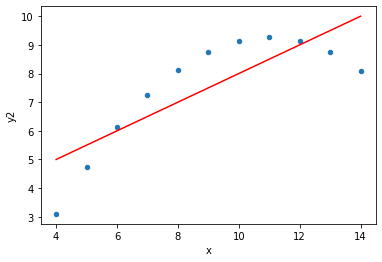

In [10]:
### Visualise the relationship between x and y on a scatterplot
ax = df.plot.scatter(x = 'x', y = 'y2')
y2 = df['y2']
X = df[['x']] ### needs a double [[]] since LR model expects a matrix for it's predictors
lr = LinearRegression()
model1b = lr.fit(X, y2)
fittedline2 = model2.predict()
# Overlay best--fit line on same plot
ax.plot(df['x'], fittedline2, 'r', )#linewidth=2)
plt.show()

In [11]:
## Despite R^2 being the same, the fit is less convincing because there is a marked pattern in the errors
## Clearly a non-linear model is more appropriate

### Task 2 Performing a Linear Regression on airquality.csv

In [12]:
import pandas as pd
air = pd.read_csv('C:/Data/airquality.csv')
print(air.head())

   Day  Month  Ozone  Solar.R  Wind  Temp
0    1      5   41.0    190.0   7.4    67
1    2      5   36.0    118.0   8.0    72
2    3      5   12.0    149.0  12.6    74
3    4      5   18.0    313.0  11.5    62
4    5      5    NaN      NaN  14.3    56


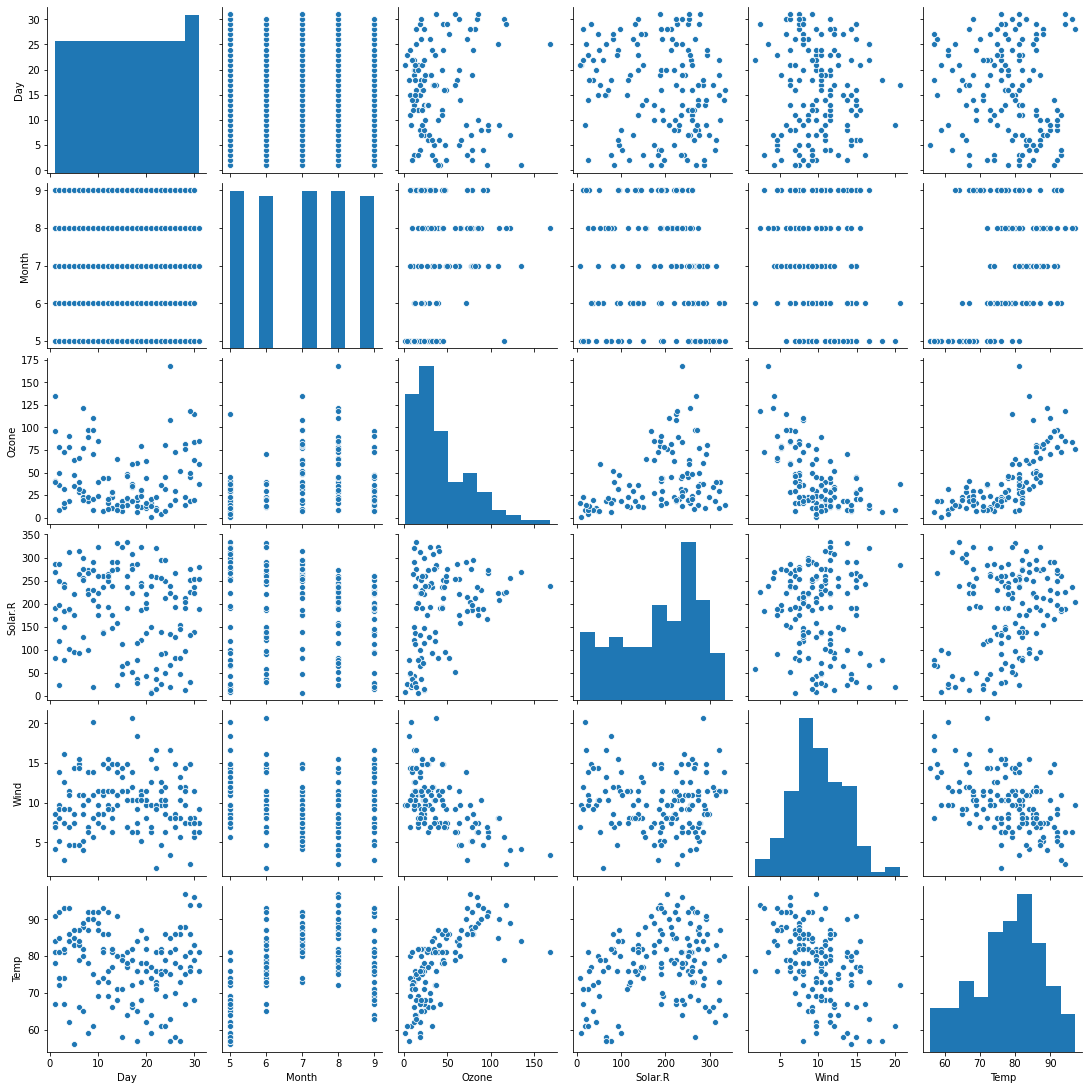

In [13]:
### explore the relationships between the variables
import seaborn
seaborn.pairplot(air)

In [14]:
## calculate the correlations
air.corr(method = "spearman")

,Day,Month,Ozone,Solar.R,Wind,Temp
Day,1.000000,-0.007852,-0.056198,-0.152308,0.037569,-0.157068
Month,-0.007852,1.000000,0.137861,-0.127823,-0.157849,0.372075
Ozone,-0.056198,0.137861,1.000000,0.348186,-0.590155,0.774043
Solar.R,-0.152308,-0.127823,0.348186,1.000000,-0.000977,0.207428
Wind,0.037569,-0.157849,-0.590155,-0.000977,1.000000,-0.446541
Temp,-0.157068,0.372075,0.774043,0.207428,-0.446541,1.000000


In [15]:
### Are there missing values???
air.isna().describe()


,Day,Month,Ozone,Solar.R,Wind,Temp
count,153,153,153,153,153,153
unique,1,1,2,2,1,1
top,False,False,False,False,False,False
freq,153,153,116,146,153,153


In [16]:
### yes there are missing values, so remove them as they will mess up regression later on!
air = air.dropna()

In [17]:
## Wind and Solar.R seem to have no correleation (-0.000977)
## Day has low correlation to all variables i.e. eather doesn't know about days of the week

In [18]:
from statsmodels.formula.api import ols 
model2c = ols("Ozone ~ Temp", data = air).fit()
model2c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.55e-17
Time:                        14:30:58   Log-Likelihood:                -508.89
No. Observations:                 111   AIC:                             1022.
Df Residuals:                     109   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -147.6461     18.755     -7.872      0.000    -184.818    -110.474
Temp           2.4391      0.239     10.192      0.000       1.965       2.913
==============================================================================
Omnibus:                       51.915   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.588
Skew:                           1.634   Prob(JB):                     6.11e-40
Kurtosis:                       8.326   Cond. No.                         647.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

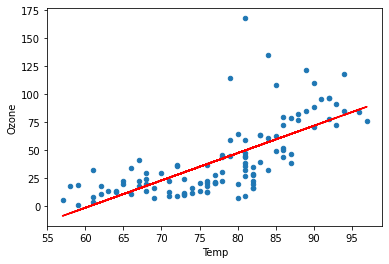

plot shows some pattern in the errors perhaps, so maybe a linear model is not perfect


In [19]:
### Visualise the relationship between x and y on a scatterplot
ax = air.plot.scatter(x = 'Temp', y = 'Ozone')
fittedline = model2c.predict()
# Overlay best--fit line on same plot
ax.plot(air['Temp'], fittedline, 'r', )#linewidth=2)
plt.show()

print("plot shows some pattern in the errors perhaps, so maybe a linear model is not perfect")

In [20]:
## Performing a LinearRegression Model using sklearn
from sklearn.linear_model import LinearRegression
y = air['Ozone']
X = air[['Temp']]
lr = LinearRegression()
model1b = lr.fit(X, y)
y_pred = model1b.predict(X)

import sklearn.metrics as metrics
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y, y_pred))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

Linear Regression
R^2 =  0.48796010099390796
MSE =  561.8688076488232
MAE =  17.264217089985678


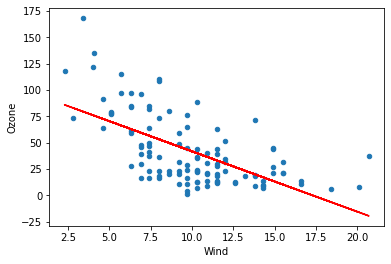

plot shows some pattern in the errors perhaps, so maybe a linear model is not perfect


In [21]:
from statsmodels.formula.api import ols 
model2c = ols("Ozone ~ Wind", data = air).fit()
model2c.summary()
### Visualise the relationship between x and y on a scatterplot
ax = air.plot.scatter(x = 'Wind', y = 'Ozone')
fittedline = model2c.predict()
# Overlay best--fit line on same plot
ax.plot(air['Wind'], fittedline, 'r', )#linewidth=2)
plt.show()

print("plot shows some pattern in the errors perhaps, so maybe a linear model is not perfect")

In [22]:
## Performing a LinearRegression Model of Ozone against Wind using sklearn
from sklearn.linear_model import LinearRegression
y = air['Ozone']
X = air[['Wind']]
lr = LinearRegression()
model1b = lr.fit(X, y)
y_pred = model1b.predict(X)

import sklearn.metrics as metrics
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y, y_pred))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

Linear Regression
R^2 =  0.3751520559966308
MSE =  685.6547115575746
MAE =  21.113644119203883


In [23]:
from statsmodels.formula.api import ols 
model2e1 = ols("Ozone ~ Temp + Wind", data = air).fit()
print(model2e1.summary())

## Performing a LinearRegression Model of Ozone against Temp and Wind using sklearn
from sklearn.linear_model import LinearRegression
y = air['Ozone']
X = air[['Temp','Wind']]
lr = LinearRegression()
model2e2 = lr.fit(X, y)
y_pred = model2e2.predict(X)

import sklearn.metrics as metrics
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y, y_pred))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     74.99
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           3.79e-21
Time:                        14:30:59   Log-Likelihood:                -497.71
No. Observations:                 111   AIC:                             1001.
Df Residuals:                     108   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.3220     23.621     -2.850      0.0

In [24]:
### regression funcions don't like a dot in variable names, so remove the .R from Solar.R

air.rename(columns={'Solar.R': "Solar"}, inplace=True)

C:\Users\DAVID\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
from statsmodels.formula.api import ols 
model2e1 = ols("Ozone ~ Temp + Wind + Solar", data = air).fit()
print(model2e1.summary())

## Performing a LinearRegression Model of Ozone against Temp and Wind using sklearn
from sklearn.linear_model import LinearRegression
y = air['Ozone']
X = air[['Temp','Wind','Solar']]
lr = LinearRegression()
model2e2 = lr.fit(X, y)
y_pred = model2e2.predict(X)

import sklearn.metrics as metrics
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y, y_pred))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.51e-21
Time:                        14:30:59   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.3421     23.055     -2.791      0.0

In [26]:
### Adding more variables improves the model fit
### Creating a non-linear model is anothe option

In [27]:
from sklearn.preprocessing import PolynomialFeatures
y = air['Ozone']
#X = df.drop(columns = 'price')
X = air[['Temp','Wind','Solar']]
# create the polynomial data features
poly = PolynomialFeatures(degree=2)      ##### Creates a model with linear and quadratic terms
Xpoly = poly.fit_transform(X)
 
lr = LinearRegression()
model = lr.fit(Xpoly,y)
y_pred = model.predict(Xpoly)
#print("coef = ",lr.coef_, " intercept=", lr.intercept_)
print("R^2 = ",model.score(Xpoly,y))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

print("Shows a better R^2, and lower MAE than an equivalent linear model")


R^2 =  0.73756356808974
MSE =  287.97530303253774
MAE =  12.658067513750396
Shows a better R^2, and lower MAE than an equivalent linear model


In [28]:
from sklearn.preprocessing import PolynomialFeatures
y = air['Ozone']
#X = df.drop(columns = 'price')
X = air[['Temp','Wind','Solar']]
# create the polynomial data features
poly = PolynomialFeatures(degree=3)      ##### Creates a model with linear and quadratic and cubic terms
Xpoly = poly.fit_transform(X)
 
lr = LinearRegression()
model = lr.fit(Xpoly,y)
y_pred = model.predict(Xpoly)
#print("coef = ",lr.coef_, " intercept=", lr.intercept_)
print("R^2 = ",model.score(Xpoly,y))
print("MSE = ", metrics.mean_squared_error(y, y_pred))
print("MAE = ", metrics.mean_absolute_error(y, y_pred))

print("Shows another improvement again shows better R^2, and lower MAE than an equivalent linear model")
print("The more complex the model becomes, the better it explains the data")

R^2 =  0.7994389399111161
MSE =  220.07856011155178
MAE =  11.350502610540335
Shows another improvement again shows better R^2, and lower MAE than an equivalent linear model
The more complex the model becomes, the better it explains the data


In [29]:
### Task 3 - Linear Regression on the Boston Housing dataset

In [43]:
# import sklearn.datasets as datasets
# Boston = datasets.load_boston()
# df = pd.DataFrame(Boston.data, columns = Boston.feature_names)
# df = df.assign(medv = Boston.target)
df = pd.read_csv('C:/Data/Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [44]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
## select the target (this is the median value of house prices)
y = df['MEDV']
## select the predictors
X = df.drop(columns = 'MEDV')
## Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1234)
## Fit the model to the training subset
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [46]:
## Evaluate on the test set
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
print("R^2(test) = ", metrics.r2_score(y_test, y_pred))
print("MSE(test) = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE(test) = ", metrics.mean_absolute_error(y_test, y_pred))

R^2(test) =  0.7339395425753109
MSE(test) =  24.525441910264178
MAE(test) =  3.7095376104328945


In [47]:
## Performing a kNearest Neighbours Regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
KNNmodel = knn.fit(X_train,y_train)
y_pred = KNNmodel.predict(X_test)

print("\nk-Nearest Neighbors")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

## Performing a Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
DTmodel = tree.fit(X_train,y_train)
y_pred = DTmodel.predict(X_test)

print("\nDecision Tree")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

## Performing a Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
RFmodel = rf.fit(X_train,y_train)
y_pred = RFmodel.predict(X_test)

print("\nRandom Forest")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))


k-Nearest Neighbors
R^2 =  0.6327111772362655
MSE =  33.856668421052625
MAE =  3.925263157894736

Decision Tree
R^2 =  0.85021789847722
MSE =  13.80690789473684
MAE =  2.6677631578947367

Random Forest
R^2 =  0.8888007443737731
MSE =  10.250342763157905
MAE =  2.1575921052631593


In [34]:
### Random Forest seems most accurate (it often is, as it's the most complex model)

### Task 4 - Linear Regression on the fifa.csv dataset

In [35]:
## Ensure classes for constructing a dataframe are loaded and load the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
## You will have to adapt the pathname to match the drive and location on your own PC
fifa = pd.read_csv("C:/Data/fifa.csv")
fifa.head()

,ID,Name,Nationality,Age,OverallRating,Club,HeightCM,HeightFtIn,WeightKg,WeightSt,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,Sliding Tackle
0,230212,A. Benjamin Chiamuloira Paes,Brazil,31,79,Internacional,182,"6'0""",79.4,12st 6lb,...,51,88,77,24,47,66,70,81,78,81
1,248767,A. Pimenta Flora Pimenta,Portugal,20,53,Venezia FC,184,"6'0""",75.3,11st 11lb,...,42,40,23,43,51,53,50,22,25,28
2,190883,A.J. DeLaGarza,Guam,31,66,Houston Dynamo,174,"5'9""",68.1,10st 10lb,...,36,71,66,55,56,52,64,64,62,63
3,234290,Aapo Halme,Finland,21,63,Barnsley,197,"6'5""",77.7,12st 4lb,...,18,62,57,27,32,31,62,58,61,57
4,203504,Aaron Amadi-Holloway,Wales,26,61,Brisbane Roar,189,"6'2""",83.3,13st 1lb,...,49,58,48,56,46,59,51,32,52,48


In [36]:
## which variables infuence the OverallRating of the player most?
fifa.corrwith(fifa['OverallRating'], method = "spearman").sort_values()

ID                 -0.540573
HeightCM            0.039131
Balance             0.105781
WeightKg            0.150908
Acceleration        0.177481
SprintSpeed         0.196356
WeakFoot            0.217326
Agility             0.261076
Sliding Tackle      0.285973
Jumping             0.292163
StandingTackle      0.322181
Marking             0.348540
Finishing           0.354408
Penalties           0.355314
Strength            0.365758
Interceptions       0.372419
FreeKickAccuracy    0.381646
Volleys             0.391294
IntlRep             0.409734
HeadingAccuracy     0.420235
Aggression          0.428054
Stamina             0.429985
Curve               0.434616
Crossing            0.443799
Positioning         0.444134
LongShots           0.466663
Age                 0.485346
Dribbling           0.502547
Vision              0.518768
LongPassing         0.522972
ShotPower           0.569698
BallControl         0.628302
ShortPassing        0.629568
Composure           0.743966
wageEuro      

Preapare the data for regression analysis

In [37]:
## Clean the dataset. Remove any rows that have missing values
fifa = fifa.dropna()   # or fifa.dropna(inplace = True)
## Remove any duplicated players (we say there were some back in Worksheet 4)
fifa.drop_duplicates('ID', inplace = True)

## Extract OverallRating as the target variable y
y = fifa['OverallRating']
## Extract the eight identified features that have strongest correlation to OverallRating
## We ignore valueEuro and wageEuro because we might assume they are consequences rather than predictors of high rating
X = fifa[['Reactions', 'Composure', 'ShortPassing', 'BallControl', 'ShotPower', 'LongPassing', 'Vision', 'Dribbling']]

## Perform a train:test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Perform the regression analysis and view the performance metrics (R^2, MSE, MAE)

In [38]:
## Performing a LinearRegression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
LRmodel = lr.fit(X_train,y_train)
y_pred = LRmodel.predict(X_test)

import sklearn.metrics as metrics
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

## Performing a kNearest Neighbours Regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
KNNmodel = knn.fit(X_train,y_train)
y_pred = KNNmodel.predict(X_test)

print("\nk-Nearest Neighbors")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

## Performing a Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
DTmodel = tree.fit(X_train,y_train)
y_pred = DTmodel.predict(X_test)

print("\nDecision Tree")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

## Performing a Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
RFmodel = rf.fit(X_train,y_train)
y_pred = RFmodel.predict(X_test)

print("\nRandom Forest")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))


Linear Regression
R^2 =  0.782222052771751
MSE =  10.265631813230897
MAE =  2.512585451586427

k-Nearest Neighbors
R^2 =  0.8606402370555845
MSE =  6.569150063973679
MAE =  1.9439956132334122

Decision Tree
R^2 =  0.7390074039251526
MSE =  12.30268689453482
MAE =  2.671540851763846

Random Forest
R^2 =  0.8729518834222504
MSE =  5.988802833120087
MAE =  1.867258270882837


Random Forest seems to be the most accurate (but takes much longer to run)
